<a href="https://colab.research.google.com/github/lukaszchomatek/colab-dl-demos/blob/master/regression_vs_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import fetch_openml
df = fetch_openml(name="boston", version=1, as_frame=True)
df = df.frame
df.head()


fg
df
g
sdf
gs
dfg
s
fdg
sdfg
sdf



NameError: name 'fg' is not defined

In [ ]:
df.info()
print(df.corr(numeric_only=True)["MEDV"].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
AGE       -0.376955
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507

Text(0.5, 1.0, 'RM vs MEDV')

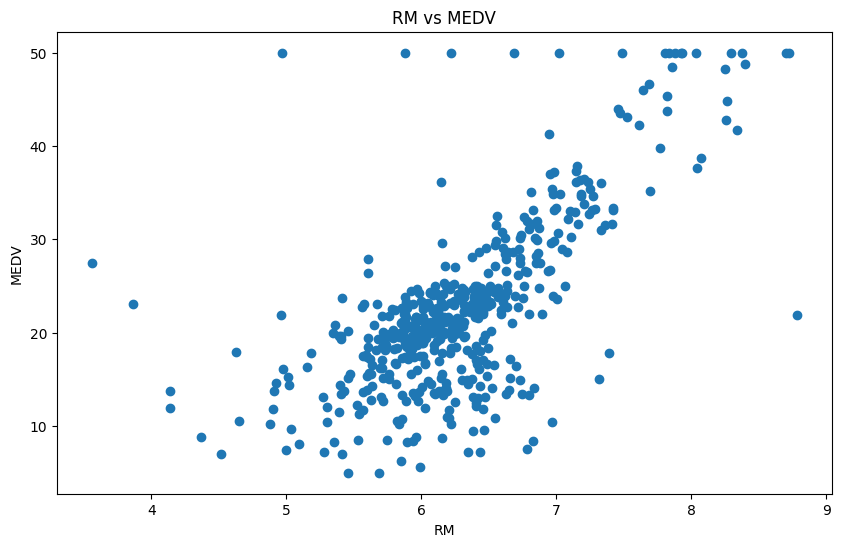

In [ ]:
feature = "RM"
plt.figure(figsize=(10, 6))
plt.scatter(df[feature], df["MEDV"])
plt.xlabel(feature)
plt.ylabel("MEDV")
plt.title(f"{feature} vs MEDV")

In [ ]:
X = df[[feature]]
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

model.coef_[0]
model.intercept_

np.float64(-36.24631889813795)

Text(0, 0.5, 'MEDV')

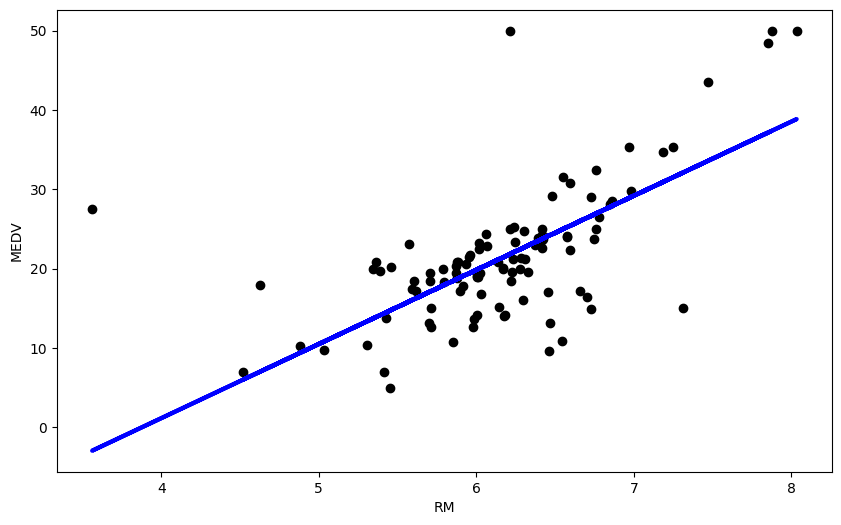

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred_lr, color="blue", linewidth=3)
plt.xlabel(feature)
plt.ylabel("MEDV")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Skalowanie danych (opcjonalne, ale zalecane dla sieci neuronowych)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Budowa modelu sieci głębokiej
model_nn = Sequential([
    Dense(50, activation='gelu', input_shape=(X_train_scaled.shape[1],)), # Warstwa wejściowa + ukryta 1
    Dense(50, activation='gelu'), # Warstwa ukryta 2
    Dense(1) # Warstwa wyjściowa (dla regresji)
])

# Kompilacja modelu
model_nn.compile(optimizer='adam', loss='mse')

# Trening modelu
history = model_nn.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=0)

# Ocena modelu
loss = model_nn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Mean Squared Error (MSE) modelu sieci głębokiej: {loss}")

# Predykcja na danych testowych
y_pred_nn = model_nn.predict(X_test_scaled)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error (MSE) modelu sieci głębokiej: 44.114112854003906
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


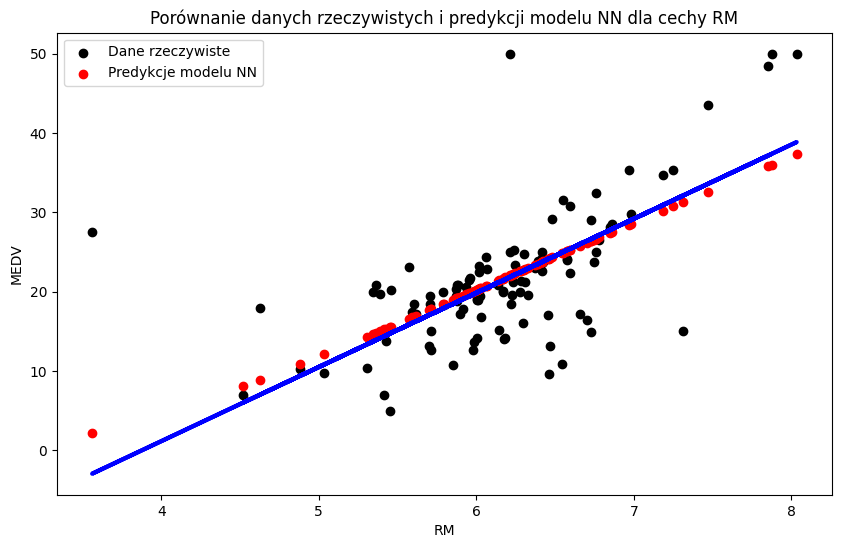

In [ ]:
# Wizualizacja wyników (opcjonalnie)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="black", label="Dane rzeczywiste")
plt.scatter(X_test, y_pred_nn, color="red", label="Predykcje modelu NN")
plt.plot(X_test, y_pred_lr, color="blue", linewidth=3)
plt.xlabel(feature)
plt.ylabel("MEDV")
plt.title(f"Porównanie danych rzeczywistych i predykcji modelu NN dla cechy {feature}")
plt.legend()
plt.show()